In [2]:
from autocluster import AutoCluster
from algorithms import algorithms
from build_config_space import build_config_space
from utils.clusterutils import ClusterUtils

%load_ext autoreload
%autoreload 2

In [3]:
varied, blobs, no_structure, noisy_circles, noisy_moons, aniso = ClusterUtils.generate_sample_data(1500)

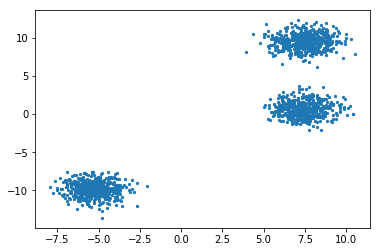

In [4]:
X = blobs[0]
ClusterUtils.visualize_sample_data(X)

In [5]:
autocluster = AutoCluster()
smac_obj, opt_result = autocluster.fit(X, algorithms_ls=['AgglomerativeClustering'], n_evaluations=30, seed=27)

Configuration space object:
  Hyperparameters:
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, l1, l2, manhattan, cosine, precomputed, cityblock}, Default: euclidean
    algorithm_choice, Type: Categorical, Choices: {AgglomerativeClustering}, Default: AgglomerativeClustering
    linkage___AgglomerativeClustering, Type: Categorical, Choices: {ward, complete, average, single}, Default: complete
    n_clusters___AgglomerativeClustering, Type: UniformInteger, Range: [1, 20], Default: 10
  Conditions:
    affinity___AgglomerativeClustering | algorithm_choice in {'AgglomerativeClustering'}
    linkage___AgglomerativeClustering | algorithm_choice in {'AgglomerativeClustering'}
    n_clusters___AgglomerativeClustering | algorithm_choice in {'AgglomerativeClustering'}
  Forbidden Clauses:
    (Forbidden: linkage___AgglomerativeClustering == 'ward' && Forbidden: affinity___AgglomerativeClustering in {'cityblock', 'cosine', 'l1', 'l2', 'manhattan', 'precomputed'})


Process pynisher function call:
Traceback (most recent call last):
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 72, in evaluate_model
    candidate_model = fit_model(cfg)
  File "/home/coffeetumbler/automl_2019/autocluster/autocluster.py", line 66, in fit_model
    model.fit(scaled_data)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py", line 868, in fit
    **kwargs)
  File "/home/coffeetumbler/anaconda3/envs/automl/lib/python3.5/

Optimization is complete, the optimal configuration is 
Configuration:
  affinity___AgglomerativeClustering, Value: 'l1'
  algorithm_choice, Value: 'AgglomerativeClustering'
  linkage___AgglomerativeClustering, Value: 'average'
  n_clusters___AgglomerativeClustering, Value: 4



In [6]:
opt_result

Configuration:
  affinity___AgglomerativeClustering, Value: 'l1'
  algorithm_choice, Value: 'AgglomerativeClustering'
  linkage___AgglomerativeClustering, Value: 'average'
  n_clusters___AgglomerativeClustering, Value: 4

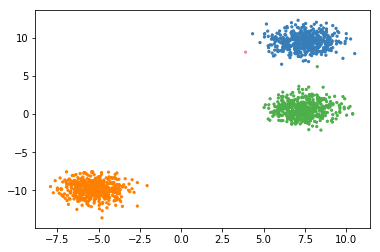

array([0, 0, 0, ..., 0, 1, 1])

In [7]:
autocluster.predict(X)

In [8]:
smac_obj.get_trajectory()

[TrajEntry(train_perf=2147483648, incumbent_id=1, incumbent=Configuration:
   affinity___AgglomerativeClustering, Value: 'euclidean'
   algorithm_choice, Value: 'AgglomerativeClustering'
   linkage___AgglomerativeClustering, Value: 'complete'
   n_clusters___AgglomerativeClustering, Value: 10
 , ta_runs=0, ta_time_used=0, wallclock_time=0.0001938343048095703),
 TrajEntry(train_perf=-0.2529878654926759, incumbent_id=1, incumbent=Configuration:
   affinity___AgglomerativeClustering, Value: 'euclidean'
   algorithm_choice, Value: 'AgglomerativeClustering'
   linkage___AgglomerativeClustering, Value: 'complete'
   n_clusters___AgglomerativeClustering, Value: 10
 , ta_runs=1, ta_time_used=0.45961713790893555, wallclock_time=0.4721050262451172),
 TrajEntry(train_perf=-0.6681116726249334, incumbent_id=2, incumbent=Configuration:
   affinity___AgglomerativeClustering, Value: 'manhattan'
   algorithm_choice, Value: 'AgglomerativeClustering'
   linkage___AgglomerativeClustering, Value: 'complete

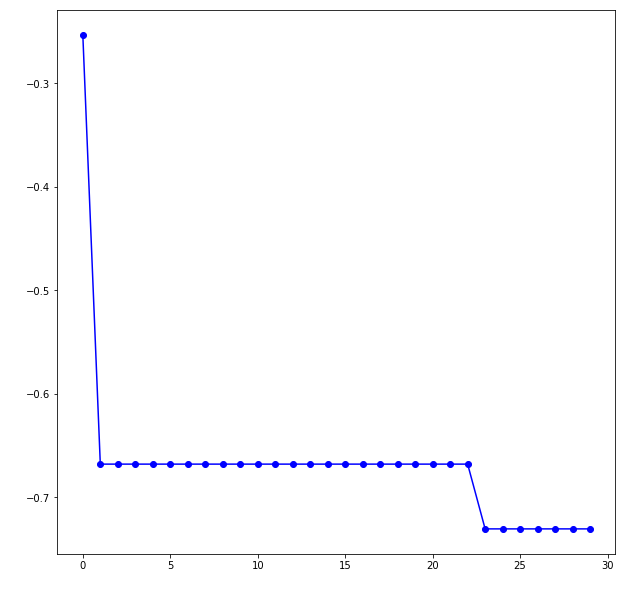

In [9]:
autocluster.plot_convergence()